# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [8]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [9]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [10]:
(df_data["Unnamed: 0.1"] == df_data["Unnamed: 0"]).value_counts()

True    4324
Name: count, dtype: int64

In [11]:
df_data.drop(["Unnamed: 0.1", "Unnamed: 0", "Detail"], axis=1, inplace=True)
df_data

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",StatusActive,145.0,Success
...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",StatusRetired,NaN,Success


In [12]:
df_data.duplicated().values.any()

True

In [13]:
df_data[df_data.duplicated(keep=False)]

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
792,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",StatusActive,29.75,Success
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",StatusActive,29.75,Success


In [14]:
df_data.drop_duplicates(inplace=True)
df_data.duplicated().values.any()

False

## Descriptive Statistics

###Type Conversions

In [15]:
pd.to_numeric(df_data.Price)

ValueError: Unable to parse string "5,000.0" at position 1915

In [16]:
df_data.Price = df_data.Price.str.replace(",", "")
df_data.Price = pd.to_numeric(df_data.Price)
df_data.Price

0       50.00
1       29.75
2         NaN
3       65.00
4      145.00
        ...  
4319      NaN
4320      NaN
4321      NaN
4322      NaN
4323      NaN
Name: Price, Length: 4323, dtype: float64

In [17]:
df_data.Date = pd.to_datetime(df_data.Date, format='mixed', utc=True)
df_data.Date

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4323, dtype: datetime64[ns, UTC]

###Get Descriptive Statistics

In [18]:
df_data.describe()

,Price
count,963.00
mean,153.92
std,288.57
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


In [19]:
df_data.Date.describe()

count                                   4323
mean     1987-11-26 22:43:25.981956928+00:00
min                1957-10-04 19:28:00+00:00
25%                1972-04-19 02:57:00+00:00
50%                1984-12-14 20:40:00+00:00
75%                2002-09-08 07:32:00+00:00
max                2020-08-07 05:12:00+00:00
Name: Date, dtype: object

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [20]:
launches_by_org = df_data.groupby("Organisation").agg({"Date": pd.Series.count}).rename({"Date": "Launches"}, axis=1)
launches_by_org.sort_values("Launches", ascending=False, inplace=True)
launches_by_org.head(10)

,Launches
Organisation,
RVSN USSR,1777
Arianespace,279
General Dynamics,251
CASC,250
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136


In [21]:
launches_by_org = launches_by_org.head(10)
fig = px.pie(names=launches_by_org.index, values=launches_by_org.Launches, title="Distribution of space mission launches by top 10 organisations", hole=0.5)
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [22]:
fig = px.pie(df_data, names="Rocket_Status", title="Active vs Retired Rockets Ratio")
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [23]:
mission_status_dist = df_data.Mission_Status.value_counts()
mission_status_dist

Mission_Status
Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [24]:
fig = px.pie(names=mission_status_dist.index, values=mission_status_dist.values, title="Distribution of Successful and Failed Missions")
fig.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [25]:
fig = px.histogram(df_data[~df_data.Price.isna()], x="Price", title="Distribution of Space Mission Launches Price (in $1M)")
fig.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [26]:
df_data.Location.head()

0           LC-39A, Kennedy Space Center, Florida, USA
1    Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                        Pad A, Boca Chica, Texas, USA
3         Site 200/39, Baikonur Cosmodrome, Kazakhstan
4             SLC-41, Cape Canaveral AFS, Florida, USA
Name: Location, dtype: object

In [27]:
df_data["country"] = df_data.Location.apply(lambda loc: loc.split(", ")[-1])
df_data

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,StatusRetired,NaN,Success,Kazakhstan


In [28]:
df_data.country.unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [29]:
new_names = {
    "Russia": "Russian Federation",
    "New Mexico": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran, Islamic Republic of",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA",
    "Iran": "Iran, Islamic Republic of",
    "South Korea": "Korea, Republic of",
    "North Korea": "Korea, Democratic People's Republic of",
    "Pacific Ocean": "Kiribati"
}

df_data.country = df_data.country.replace(new_names)
df_data.country.unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran, Islamic Republic of', 'France',
       'India', "Korea, Democratic People's Republic of", 'Kiribati',
       'Korea, Republic of', 'Brazil', 'Kenya', 'Australia'], dtype=object)

# Use a Choropleth Map to Show the Number of Failures by Country


In [30]:
failed_missions = df_data[df_data.Mission_Status == "Failure"]
failures_by_country = failed_missions.groupby("country", as_index=False).agg({"Mission_Status": pd.Series.count})
failures_by_country

,country,Mission_Status
0,Australia,3
1,Brazil,2
2,China,19
3,France,13
4,India,8
5,"Iran, Islamic Republic of",8
6,Israel,2
7,Japan,10
8,Kazakhstan,72
9,Kiribati,3


In [31]:
failures_by_country["iso_alpha"] = failures_by_country.country.apply(lambda country: countries.get(country).alpha3)
failures_by_country

,country,Mission_Status,iso_alpha
0,Australia,3,AUS
1,Brazil,2,BRA
2,China,19,CHN
3,France,13,FRA
4,India,8,IND
5,"Iran, Islamic Republic of",8,IRN
6,Israel,2,ISR
7,Japan,10,JPN
8,Kazakhstan,72,KAZ
9,Kiribati,3,KIR


In [32]:
fig = px.choropleth(failures_by_country, locations="iso_alpha", color="Mission_Status",
              hover_name="country", color_continuous_scale=px.colors.sequential.matter,
              title="Number of failed space missions by country")
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [33]:
fig = px.sunburst(df_data, path=['country', 'Organisation', 'Mission_Status'], color='Mission_Status',
            title="Mission Status Distribution by Countries and Organisations")
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [34]:
df_data_clean = df_data.dropna(subset=["Price"])
money_spent = df_data_clean.groupby("Organisation").agg({"Price": pd.Series.sum}).sort_values("Price")
money_spent

,Price
Organisation,
Virgin Orbit,12.00
Sandia,15.00
EER,20.00
ExPace,28.30
ESA,37.00
Rocket Lab,97.50
JAXA,168.00
Lockheed,280.00
Eurockot,543.40


In [35]:
fig = px.bar(x=money_spent.Price, y=money_spent.index, orientation='h', labels={'x': 'Total Money Spent', 'y': 'Organisation'},
       title='Total Amount of Money Spent by Organisation on Space Missions ($1M)')
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [36]:
mean_launch_price = df_data_clean.groupby("Organisation").agg({"Price": pd.Series.mean}).sort_values("Price")
mean_launch_price

,Price
Organisation,
Rocket Lab,7.50
Virgin Orbit,12.00
Sandia,15.00
EER,20.00
ExPace,28.30
Kosmotras,29.00
ISRO,32.49
Lockheed,35.00
ESA,37.00


In [37]:
fig = px.bar(x=mean_launch_price.Price, y=mean_launch_price.index, orientation='h', labels={'x': 'Average Launch Price', 'y': 'Organisation'},
       title='Amount of Money Spent by Organisation per Launch ($1M)')
fig.show()

# Chart the Number of Launches per Year

In [38]:
df_data['year'] = df_data.Date.dt.year
launches_per_year = df_data.groupby("year").agg({"Date": pd.Series.count})
launches_per_year

,Date
year,
1957,3
1958,28
1959,20
1960,39
1961,52
...,...
2016,90
2017,92
2018,117


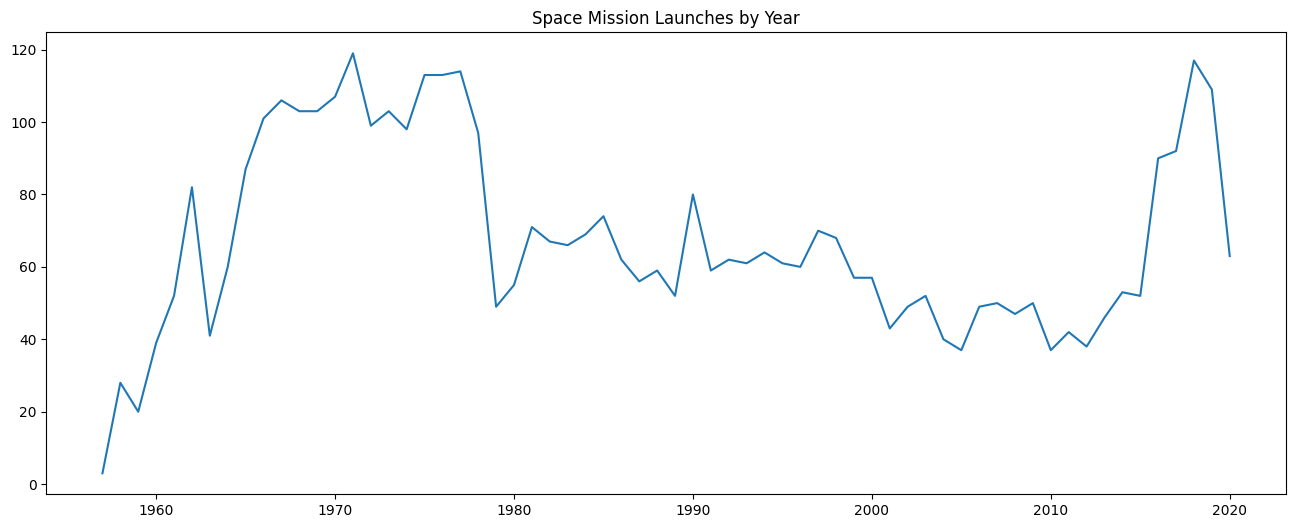

In [39]:
plt.figure(figsize=(16, 6))
plt.plot(launches_per_year.index, launches_per_year.values)
plt.title("Space Mission Launches by Year")
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [40]:
df_data["month"] = df_data.Date.dt.month
launches_by_month = df_data.groupby(["year", "month"]).agg({'Date': pd.Series.count}).rename({"Date": "launches"}, axis=1)
launches_by_month.loc[launches_by_month.launches.idxmax()]

launches    18
Name: (1971, 12), dtype: int64

In [41]:
launches_rolling = launches_by_month.rolling(window=6).mean()
launches_rolling.reset_index(inplace=True)
launches_rolling['date'] = pd.to_datetime(launches_rolling[['year', 'month']].assign(day=1))
launches_rolling

,year,month,launches,date
0,1957,10,NaN,1957-10-01
1,1957,11,NaN,1957-11-01
2,1957,12,NaN,1957-12-01
3,1958,2,NaN,1958-02-01
4,1958,3,NaN,1958-03-01
...,...,...,...,...
742,2020,4,9.67,2020-04-01
743,2020,5,9.17,2020-05-01
744,2020,6,7.67,2020-06-01
745,2020,7,8.67,2020-07-01


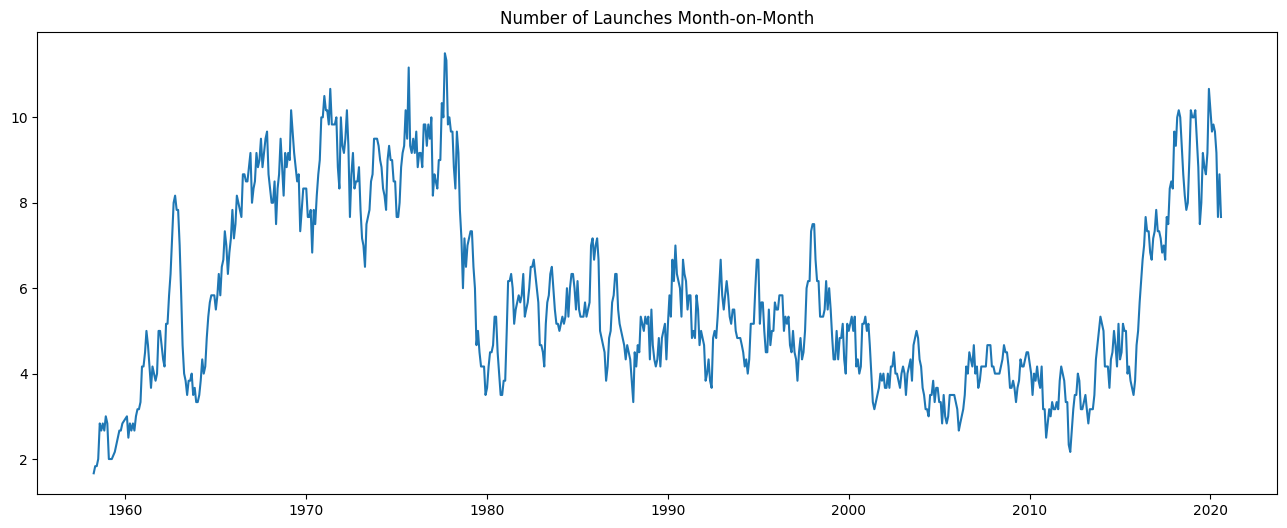

In [42]:
plt.figure(figsize=(16, 6))
plt.plot(launches_rolling.date, launches_rolling.launches)
plt.title("Number of Launches Month-on-Month")
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [43]:
launches_by_month = df_data.groupby("month").agg({"Date": pd.Series.count})
fig = px.bar(x=launches_by_month.index, y=launches_by_month.Date, labels={'x': 'Month Number', 'y': 'Total Launches'})
fig.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [45]:
df_data_clean["year"] = df_data_clean.Date.dt.year
launch_price_by_year = df_data_clean.groupby("year").agg({"Price": pd.Series.mean})
launch_price_by_year

<ipython-input-45-ad02d2a4d107>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Price
year,
1964,63.23
1965,63.23
1966,59.00
1967,196.62
1968,279.20
1969,609.50
1970,"1,160.00"
1971,"1,160.00"
1972,"1,160.00"


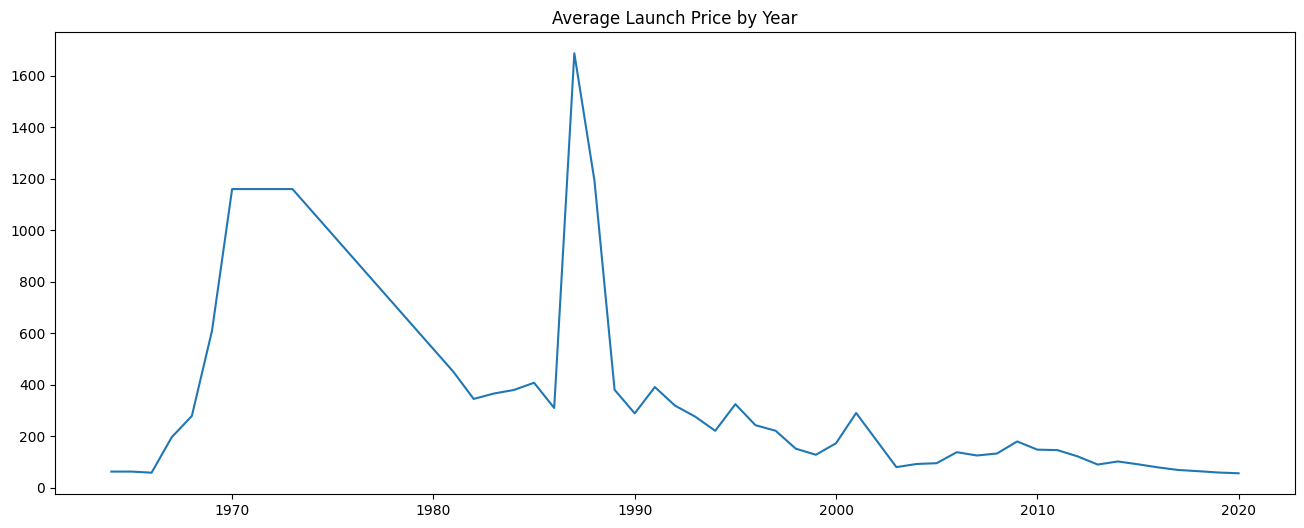

In [46]:
plt.figure(figsize=(16, 6))
plt.plot(launch_price_by_year.index, launch_price_by_year)
plt.title("Average Launch Price by Year")
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [47]:
launches_over_time = df_data.groupby(["Organisation", "year"], as_index=False).agg({"Date": pd.Series.count})
launches_over_time = launches_over_time[launches_over_time.Organisation.isin(launches_by_org.index)]
launches_over_time

,Organisation,year,Date
12,Arianespace,1984,3
13,Arianespace,1985,4
14,Arianespace,1986,3
15,Arianespace,1987,2
16,Arianespace,1988,6
...,...,...,...
654,VKS RF,2016,4
655,VKS RF,2017,6
656,VKS RF,2018,5
657,VKS RF,2019,8


In [48]:
fig = px.line(launches_over_time, x="year", y="Date", color="Organisation")
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [49]:
cold_war = df_data[(df_data.country.isin(["USA", "Kazakhstan", "Russian Federation"])) & (df_data.year <= 1991)]
cold_war

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status,country,year,month
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,StatusRetired,NaN,Success,Kazakhstan,1991,12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,StatusRetired,NaN,Success,Russian Federation,1991,12
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,StatusRetired,NaN,Success,USA,1991,12
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,StatusRetired,NaN,Success,USA,1991,11
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,StatusRetired,NaN,Success,Russian Federation,1991,11
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,StatusRetired,NaN,Failure,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,StatusRetired,NaN,Success,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,StatusRetired,NaN,Failure,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,StatusRetired,NaN,Success,Kazakhstan,1957,11


In [50]:
cold_war.loc[cold_war['country'].isin(["Kazakhstan", "Russian Federation"]), 'country'] = "USSR"
cold_war

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status,country,year,month
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,StatusRetired,NaN,Success,USSR,1991,12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,StatusRetired,NaN,Success,USSR,1991,12
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,StatusRetired,NaN,Success,USA,1991,12
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,StatusRetired,NaN,Success,USA,1991,11
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,StatusRetired,NaN,Success,USSR,1991,11
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,StatusRetired,NaN,Failure,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,StatusRetired,NaN,Success,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,StatusRetired,NaN,Failure,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,StatusRetired,NaN,Success,USSR,1957,11


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [51]:
cold_war_launches = cold_war.country.value_counts()
cold_war_launches

country
USSR    1770
USA      662
Name: count, dtype: int64

In [52]:
fig = px.pie(names=cold_war_launches.index, values=cold_war_launches.values, title="Total number of launches of the USSR and the USA")
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [53]:
cold_war_by_year = cold_war.groupby(["country", "year"], as_index=False).agg({"Date": pd.Series.count}).rename({"Date": "launches"}, axis=1)
cold_war_by_year

,country,year,launches
0,USA,1957,1
1,USA,1958,23
2,USA,1959,16
3,USA,1960,30
4,USA,1961,43
...,...,...,...
65,USSR,1987,42
66,USSR,1988,36
67,USSR,1989,26
68,USSR,1990,37


In [54]:
fig = px.line(cold_war_by_year, x="year", y="launches", color="country", title="Number of Launches Year-by-Year during Cold War")
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [55]:
cold_war_failures = cold_war[cold_war.Mission_Status == "Failure"]
cold_war_yearly_failures = cold_war_failures.groupby(["country", "year"], as_index=False).agg({"Date": pd.Series.count}).rename({"Date": "count"}, axis=1)
cold_war_yearly_failures

,country,year,count
0,USA,1957,1
1,USA,1958,16
2,USA,1959,8
3,USA,1960,14
4,USA,1961,13
5,USA,1962,8
6,USA,1963,4
7,USA,1964,4
8,USA,1965,6
9,USA,1966,2


In [56]:
fig = px.line(cold_war_yearly_failures, x="year", y="count", color="country", title="Cold War Total Number of Mission Failures Year on Year")
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [57]:
def calculate_failure_percentage(group):
    total = group.count()
    failures = (group == "Failure").sum()
    return (failures / total) * 100

cold_war_failures_perc = cold_war.groupby(["country", "year"], as_index=False).agg(failure_percentage=("Mission_Status", calculate_failure_percentage))
cold_war_failures_perc

,country,year,failure_percentage
0,USA,1957,100.00
1,USA,1958,69.57
2,USA,1959,50.00
3,USA,1960,46.67
4,USA,1961,30.23
...,...,...,...
65,USSR,1987,0.00
66,USSR,1988,0.00
67,USSR,1989,3.85
68,USSR,1990,2.70


In [58]:
fig = px.line(cold_war_failures_perc, x="year", y="failure_percentage", color="country", title="Cold War Space Mission Launches Percentage of Failures over Time")
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [59]:
launches_country_year = df_data.groupby(['country', 'year'], as_index=False).agg(launches=("Date", pd.Series.count))
max_launches_per_year = launches_country_year.loc[launches_country_year.groupby('year').launches.idxmax()]
max_launches_per_year

,country,year,launches
207,Kazakhstan,1957,2
364,USA,1958,23
365,USA,1959,16
366,USA,1960,30
367,USA,1961,43
...,...,...,...
422,USA,2016,27
423,USA,2017,30
53,China,2018,39
54,China,2019,34


In [60]:
fig = px.bar(max_launches_per_year, x='year', y='launches', color='country',
       title='Leading Countries by Number of Launches for Each Year')
fig.show()

In [61]:
successful_launches = df_data[df_data.Mission_Status == 'Success']
successful_launches_country_year = successful_launches.groupby(['country', 'year'], as_index=False).agg(launches=("Date", pd.Series.count))
max_successful_launches_per_year = successful_launches_country_year.loc[successful_launches_country_year.groupby('year').launches.idxmax()]

fig = px.bar(max_successful_launches_per_year, x='year', y='launches', color='country',
       title='Leading Countries by Number of Successful(!) Launches for Each Year')
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [62]:
launches_organisation_year = df_data.groupby(['Organisation', 'year'], as_index=False).agg(launches=("Date", pd.Series.count))
max_org_launches_per_year = launches_organisation_year.loc[launches_organisation_year.groupby('year').launches.idxmax()]
max_org_launches_per_year

,Organisation,year,launches
497,RVSN USSR,1957,2
624,US Navy,1958,12
599,US Air Force,1959,10
600,US Air Force,1960,21
601,US Air Force,1961,23
...,...,...,...
117,CASC,2016,22
578,SpaceX,2017,18
119,CASC,2018,37
120,CASC,2019,27


In [63]:
fig = px.bar(max_org_launches_per_year, x='year', y='launches', color='Organisation',
       title='Leading Organisations by Number of Launches for Each Year')
fig.show()